In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def load_data(transactions_path, customers_path, products_path):
    transactions = pd.read_csv(transactions_path)
    customers = pd.read_csv(customers_path)
    products = pd.read_csv(products_path)
    data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')
    return data

In [19]:
def preprocess_data(data):
    customer_data = data.groupby('CustomerID').agg({
        'TotalValue': 'sum',
        'Quantity': 'sum',
        'Price_y': 'mean'
    }).reset_index()
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(customer_data[['TotalValue', 'Quantity', 'Price_y']])
    return customer_data, normalized_data

In [20]:
def perform_kmeans(normalized_data, n_clusters=5):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(normalized_data)
    return clusters, kmeans

In [21]:
def evaluate_clustering(normalized_data, clusters):
    db_index = davies_bouldin_score(normalized_data, clusters)
    silhouette_avg = silhouette_score(normalized_data, clusters)
    print(f"Davies-Bouldin Index: {db_index}")
    print(f"Silhouette Score: {silhouette_avg}")
    return db_index, silhouette_avg

In [22]:
def visualize_clusters(normalized_data, clusters, kmeans):

    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x=normalized_data[:, 0], y=normalized_data[:, 1],
        hue=clusters, palette='viridis', s=100
    )
    plt.title('Customer Clusters')
    plt.xlabel('Normalized TotalValue')
    plt.ylabel('Normalized Quantity')
    plt.legend(title='Cluster')
    plt.grid()
    cluster_centers = kmeans.cluster_centers_
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=200, label='Cluster Centers')
    plt.legend()
    plt.show()


In [23]:
def save_results(customer_data, output_path):
    customer_data.to_csv(output_path, index=False)
    print(f"Clustering results saved to {output_path}")

In [24]:
def perform_clustering(transactions_path, customers_path, products_path, output_path, n_clusters=5):
    data = load_data(transactions_path, customers_path, products_path)
    customer_data, normalized_data = preprocess_data(data)
    clusters, kmeans = perform_kmeans(normalized_data, n_clusters)
    customer_data['Cluster'] = clusters
    evaluate_clustering(normalized_data, clusters)
    visualize_clusters(normalized_data, clusters, kmeans)
    save_results(customer_data, output_path)

Davies-Bouldin Index: 0.9467058109377833
Silhouette Score: 0.3089418346421452


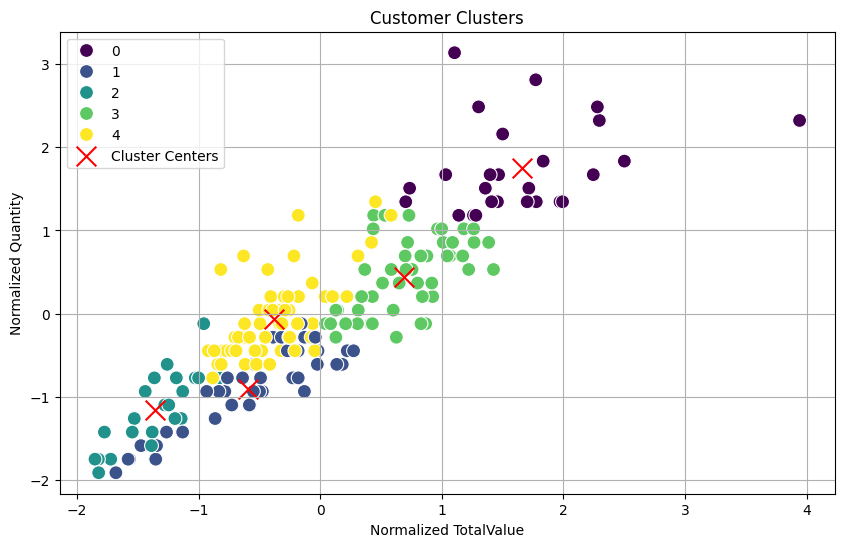

Clustering results saved to Clustering_Results.csv


In [25]:
perform_clustering(
    transactions_path='Transactions.csv',
    customers_path='Customers.csv',
    products_path='Products.csv',
    output_path='Clustering_Results.csv',
    n_clusters=5
)